# Structured data classification II

*This tutorial is mainly based on the Keras tutorial ["Structured data classification from scratch"](https://keras.io/examples/structured_data/structured_data_classification_from_scratch/) by François Chollet and ["Classify structured data using Keras preprocessing layers"](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers) by TensorFlow.*

- The following tutorial is an advanced version of ![](structured_data_classification_intro.ipynb) where we will use more functions.

## Setup

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

tf.__version__

'2.7.1'

## Data




Here's the description of each feature:

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | normal; fixed defect; reversible defect | Categorical (string)
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

The following feature are continuous numerical features:

- `age`
- `trestbps`
- `chol`
- `thalach`
- `oldpeak`
- `slope`

The following features are *categorical features* encoded as integers:

- `sex`
- `cp`
- `fbs`
- `restecg`
- `exang`
- `ca`

The following feature is a *categorical features* encoded as string:

- `thal`

### Data import


- Let's download the data and load it into a Pandas dataframe:

In [2]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


### Define label

- Define outcome variable as `y_label`

In [5]:
y_label = 'target'

### Data format

First, we make some changes to our data

- Due to performance reasons we change: 
  - `int64` to `int32`
  - `float64` to `float32` 

In [6]:
# Make a dictionary with int64 columns as keys and np.int32 as values
int_32 = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
# Change all columns from dictionary
df = df.astype(int_32)

float_32 = dict.fromkeys(df.select_dtypes(np.float64).columns, np.float32)
df = df.astype(float_32)

In [7]:
int_32

{'age': numpy.int32,
 'sex': numpy.int32,
 'cp': numpy.int32,
 'trestbps': numpy.int32,
 'chol': numpy.int32,
 'fbs': numpy.int32,
 'restecg': numpy.int32,
 'thalach': numpy.int32,
 'exang': numpy.int32,
 'slope': numpy.int32,
 'ca': numpy.int32,
 'target': numpy.int32}

- Next, we take care of categorical data:

In [164]:
# Convert to string
df['thal'] = df['thal'].astype("string")

In [165]:
# Convert to categorical

# make a list of all categorical variables
cat_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca']

# convert variables
for i in cat_convert:
    df[i] = df[i].astype("category")

- Finally, we make lists of feature variables for later data preprocessing steps 
- Since we don't want to include our label in our data preprocessing steps, we make sure to exclude it

In [166]:
# Make list of all numerical data (except label)
list_num = df.drop(columns=[y_label]).select_dtypes(include=[np.number]).columns.tolist()

# Make list of all categorical data which is stored as integers (except label)
list_cat_int = df.drop(columns=[y_label]).select_dtypes(include=['category']).columns.tolist()

# Make list of all categorical data which is stored as string (except label)
list_cat_string = df.drop(columns=[y_label]).select_dtypes(include=['string']).columns.tolist()

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int32   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int32   
 4   chol      303 non-null    int32   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int32   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float32 
 10  slope     303 non-null    int32   
 11  ca        303 non-null    category
 12  thal      303 non-null    string  
 13  target    303 non-null    int32   
dtypes: category(6), float32(1), int32(6), string(1)
memory usage: 13.5 KB


### Data splitting

- Let's split the data into a training and validation set

In [168]:
# Make validation data
df_val = df.sample(frac=0.2, random_state=1337)

# Create training data
df_train = df.drop(df_val.index)

In [169]:
print(
    "Using %d samples for training and %d for validation"
    % (len(df_train), len(df_val))
)

Using 242 samples for training and 61 for validation


### Transform data to tensors

- Let's generate [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) objects for our training and validation dataframes

- The following utility function converts each training and validation set into a tf.data.Dataset, then shuffles and batches the data.

In [170]:
# Define a function to create our tensors

def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop(y_label)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    df = ds.prefetch(batch_size)
    return ds

- Next, we test our function

- We use a small batch size to keep the output readable

In [171]:
batch_size = 5

train_ds = dataframe_to_dataset(df_train, batch_size=batch_size)

- Let's take a look at the data:

In [172]:
[(train_features, label_batch)] = train_ds.take(1)

print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['age'])
print('A batch of targets:', label_batch )

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor([52 45 60 42 47], shape=(5,), dtype=int32)
A batch of targets: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int32)


- As the output demonstrates, the training set returns a dictionary of column names (from the DataFrame) that map to column values from rows.

- Earlier, you used a small batch size to demonstrate the input pipeline. 
- Let's now create a new input pipeline with a larger batch size:

In [173]:
batch_size = 32

ds_train = dataframe_to_dataset(df_train, shuffle=True, batch_size=batch_size)
ds_val = dataframe_to_dataset(df_val, shuffle=True, batch_size=batch_size)

## Feature preprocessing

- Next, we define utility functions to do the feature preprocessing operations.

- In this tutorial, you will use the following preprocessing layers to demonstrate how to perform preprocessing, structured data encoding, and feature engineering:

- `tf.keras.layers.Normalization`: Performs feature-wise normalization of input features.

- `tf.keras.layers.CategoryEncoding`: Turns integer categorical features into one-hot, multi-hot, or tf-idf dense representations.

- `tf.keras.layers.StringLookup`: Turns string categorical values into integer indices.

- `tf.keras.layers.IntegerLookup`: Turns integer categorical values into integer indices.


### Numerical preprocessing function

- Define a new utility function that returns a layer which applies feature-wise normalization to numerical features using that Keras preprocessing layer:

In [174]:
# Define numerical preprocessing function
def get_normalization_layer(name, dataset):
    
    # Create a Normalization layer for our feature
    normalizer = layers.Normalization(axis=None)

    # Prepare a dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    return normalizer

- Next, test the new function by calling it on the total uploaded pet photo features to normalize 'PhotoAmt':

In [175]:
test_age_feature = train_features['age']

test_age_layer = get_normalization_layer('age', train_ds)

test_age_layer(test_age_feature)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.29864562, -1.0903649 ,  0.60617656, -1.4296733 , -0.86415946],
      dtype=float32)>

### Categorical preprocessing functions

- Define another new utility function that returns a layer which maps values from a vocabulary to integer indices and multi-hot encodes the features using the tf.keras.layers.StringLookup, tf.keras.layers.IntegerLookup, and tf.keras.CategoryEncoding preprocessing layers:

In [176]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

- Test the get_category_encoding_layer function by calling it on pet 'Thal' features to turn them into multi-hot encoded tensors:

In [177]:
test_thal_feature = train_features['thal']

test_thal_layer = get_category_encoding_layer(name='thal',
                                              dataset=train_ds,
                                              dtype='string')
test_thal_layer(test_thal_feature)

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0.], dtype=float32)>

### Data preprocessing

Next, we will:

- Apply the preprocessing utility functions defined earlier on our numerical and categorical features and store it into `encoded_features`
- Add all the feature inputs to a list called `all_inputs`.

In [178]:
all_inputs = []
encoded_features = []

#### Create tensors 

- Earlier, we used a small batch size to demonstrate the input pipeline. 
- Let's now create a new input pipeline with a larger batch size of 256:

#### Numerical preprocessing

- Normalize the numerical features 
- Add them to one list of inputs called `encoded_features`:

In [179]:
# Numerical features.
for feature in list_num:
  numeric_col = tf.keras.Input(shape=(1,), name=feature)
  normalization_layer = get_normalization_layer(feature, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

#### Categorical preprocessing

- Turn the integer categorical values from the dataset into integer indices, perform multi-hot encoding and add the resulting feature inputs to encoded_feature

In [180]:
for feature in list_cat_int:
  categorical_col = tf.keras.Input(shape=(1,), name=feature, dtype='int32')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=train_ds,
                                               dtype='int32',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [181]:
for feature in list_cat_string:
  categorical_col = tf.keras.Input(shape=(1,), name=feature, dtype='string')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

- Merge the list of feature inputs (encoded_features) into one vector via concatenation with layers.concatenate.

In [182]:
all_features = layers.concatenate(encoded_features)

## Model

Now we can build the model using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional): 

1. We use 32 number of units in the first layer
1. We use [layers.Dropout()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) to prevent overvitting
1. Our output layer has 1 output (since the classification task is binary)
1. tf.keras.Model groups layers into an object with training and inference features.


In [183]:
# First layer
x = layers.Dense(32, activation="relu")(all_features)
# Dropout to prevent overvitting
x = layers.Dropout(0.2)(x)
# Output layer
output = layers.Dense(1, activation="sigmoid")(x)

# Group all layers 
model = tf.keras.Model(all_inputs, output)

- Configure the model with Keras Model.compile:

In [184]:
model.compile(optimizer="adam", 
              loss ="binary_crossentropy", 
              metrics=["accuracy"])

Let's visualize our connectivity graph:

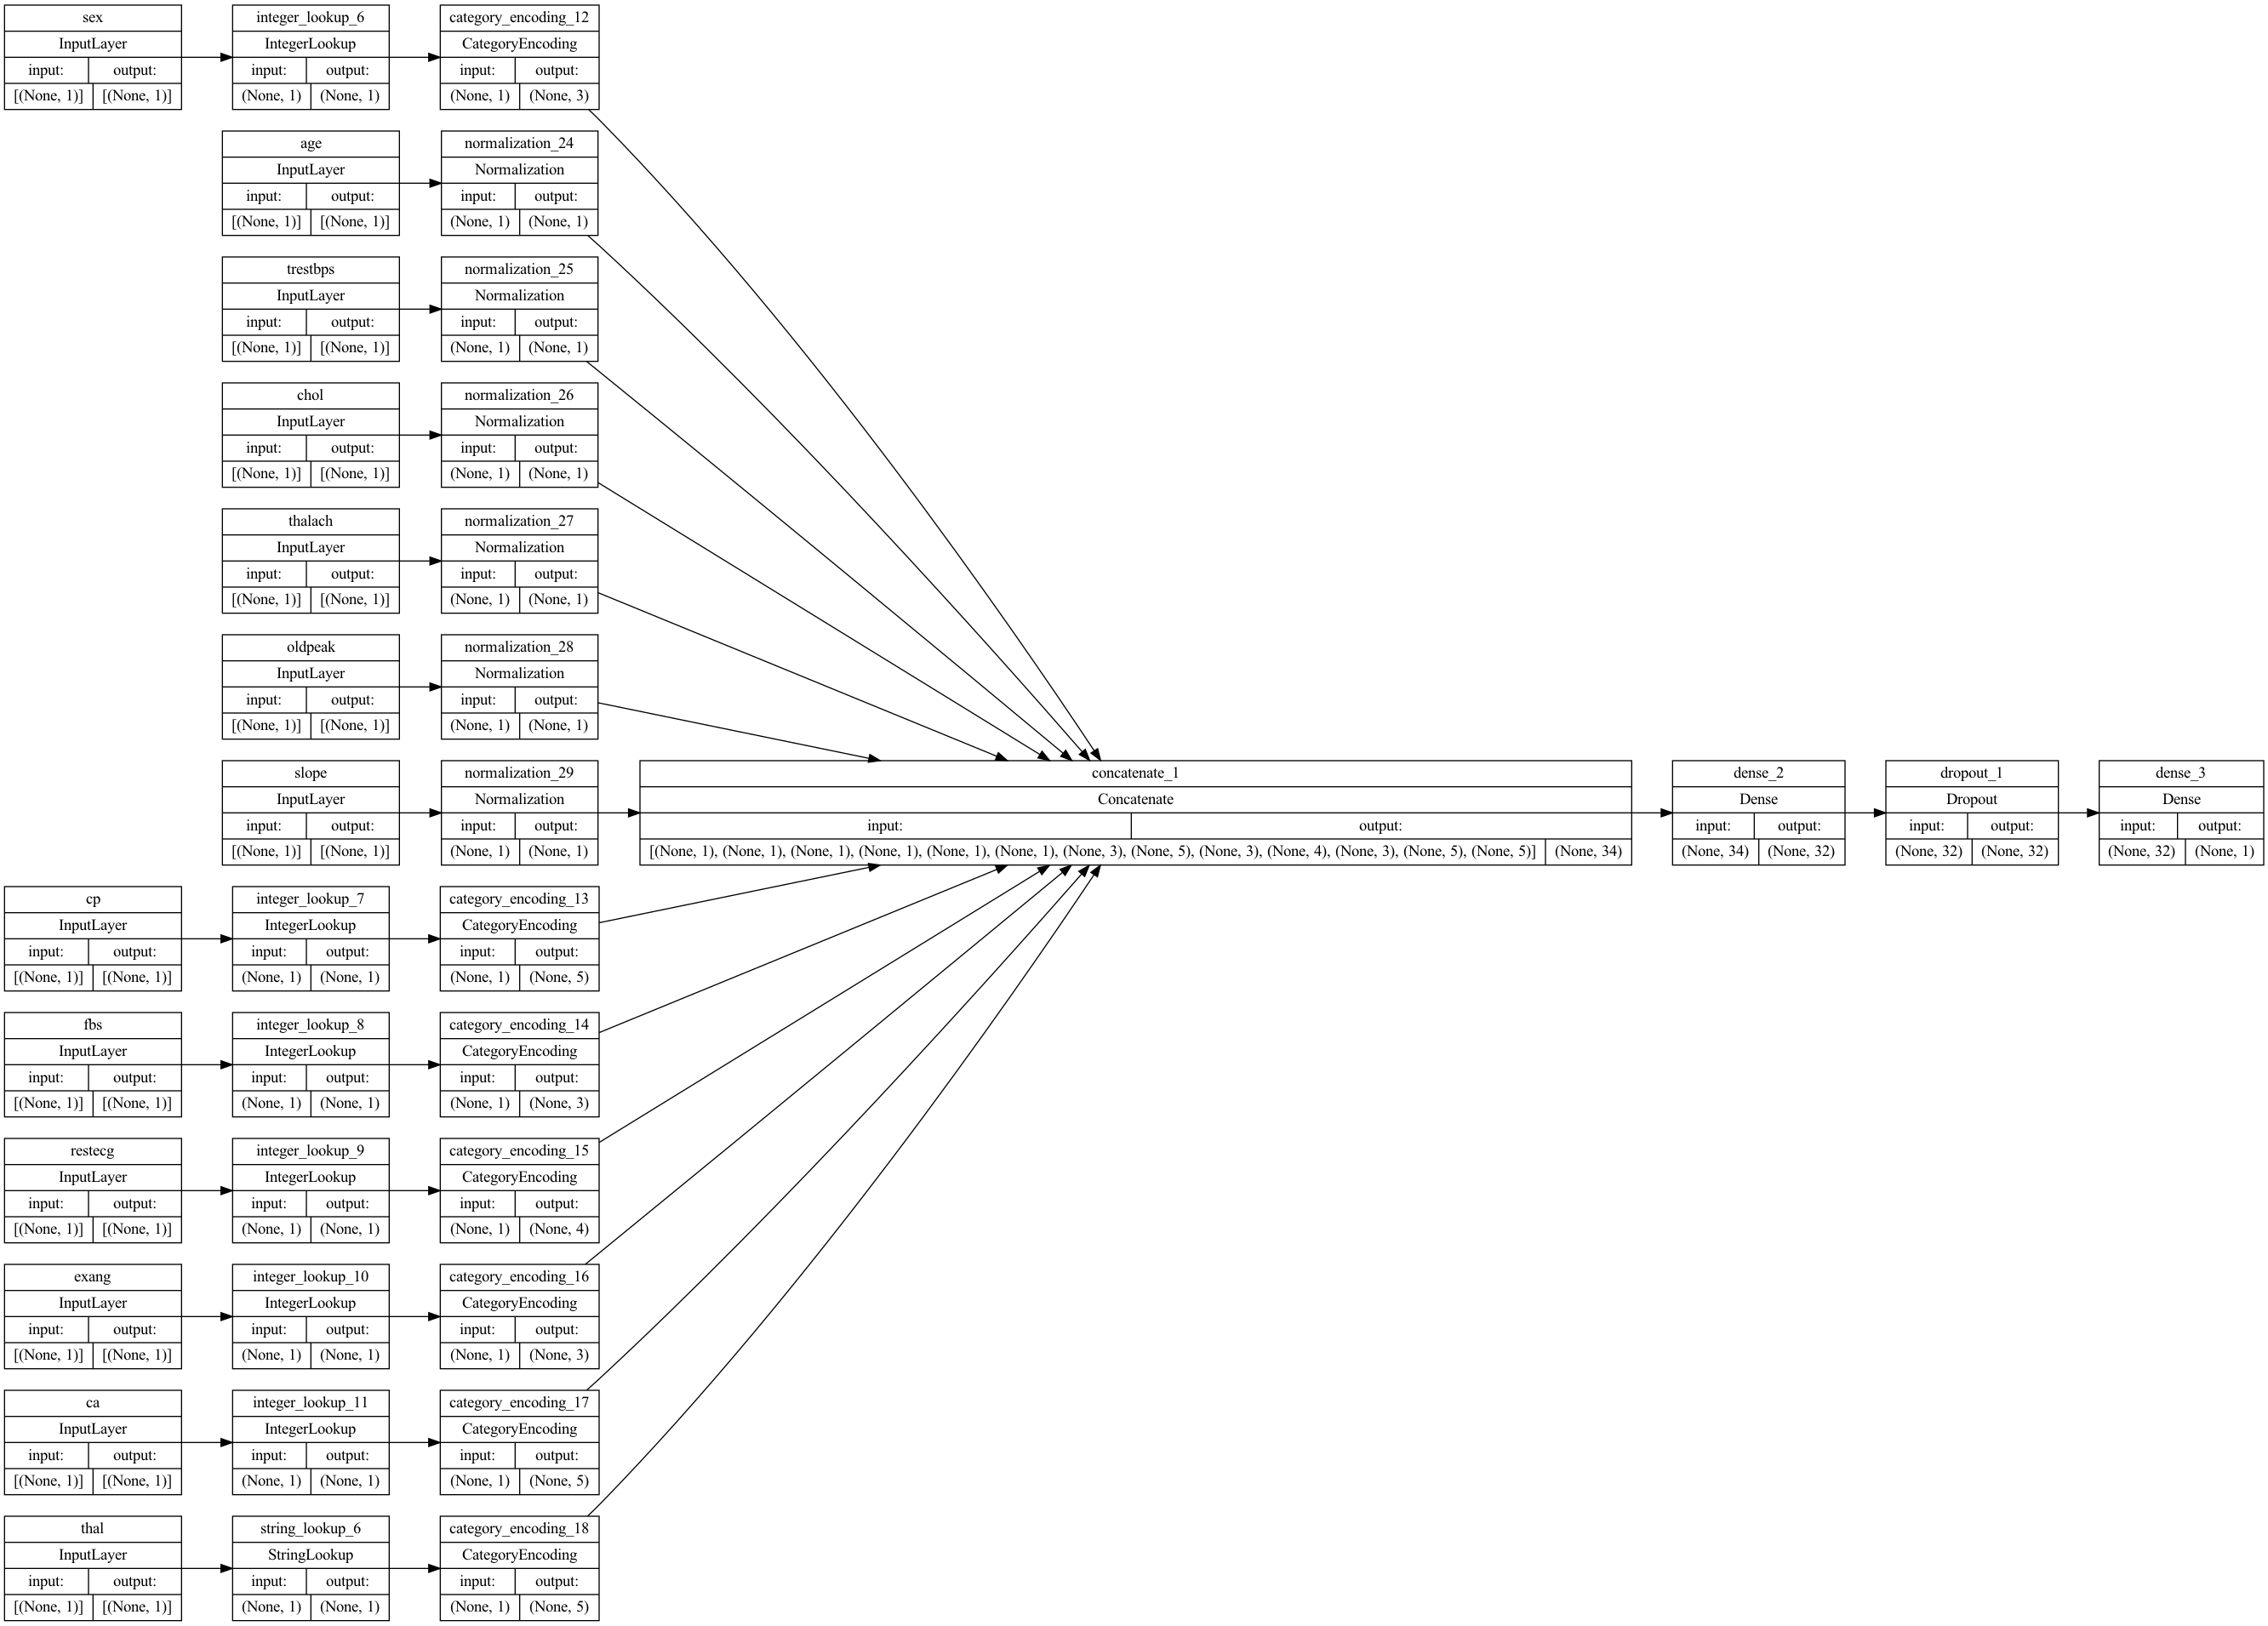

In [185]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

- Let's visualize the connectivity graph:

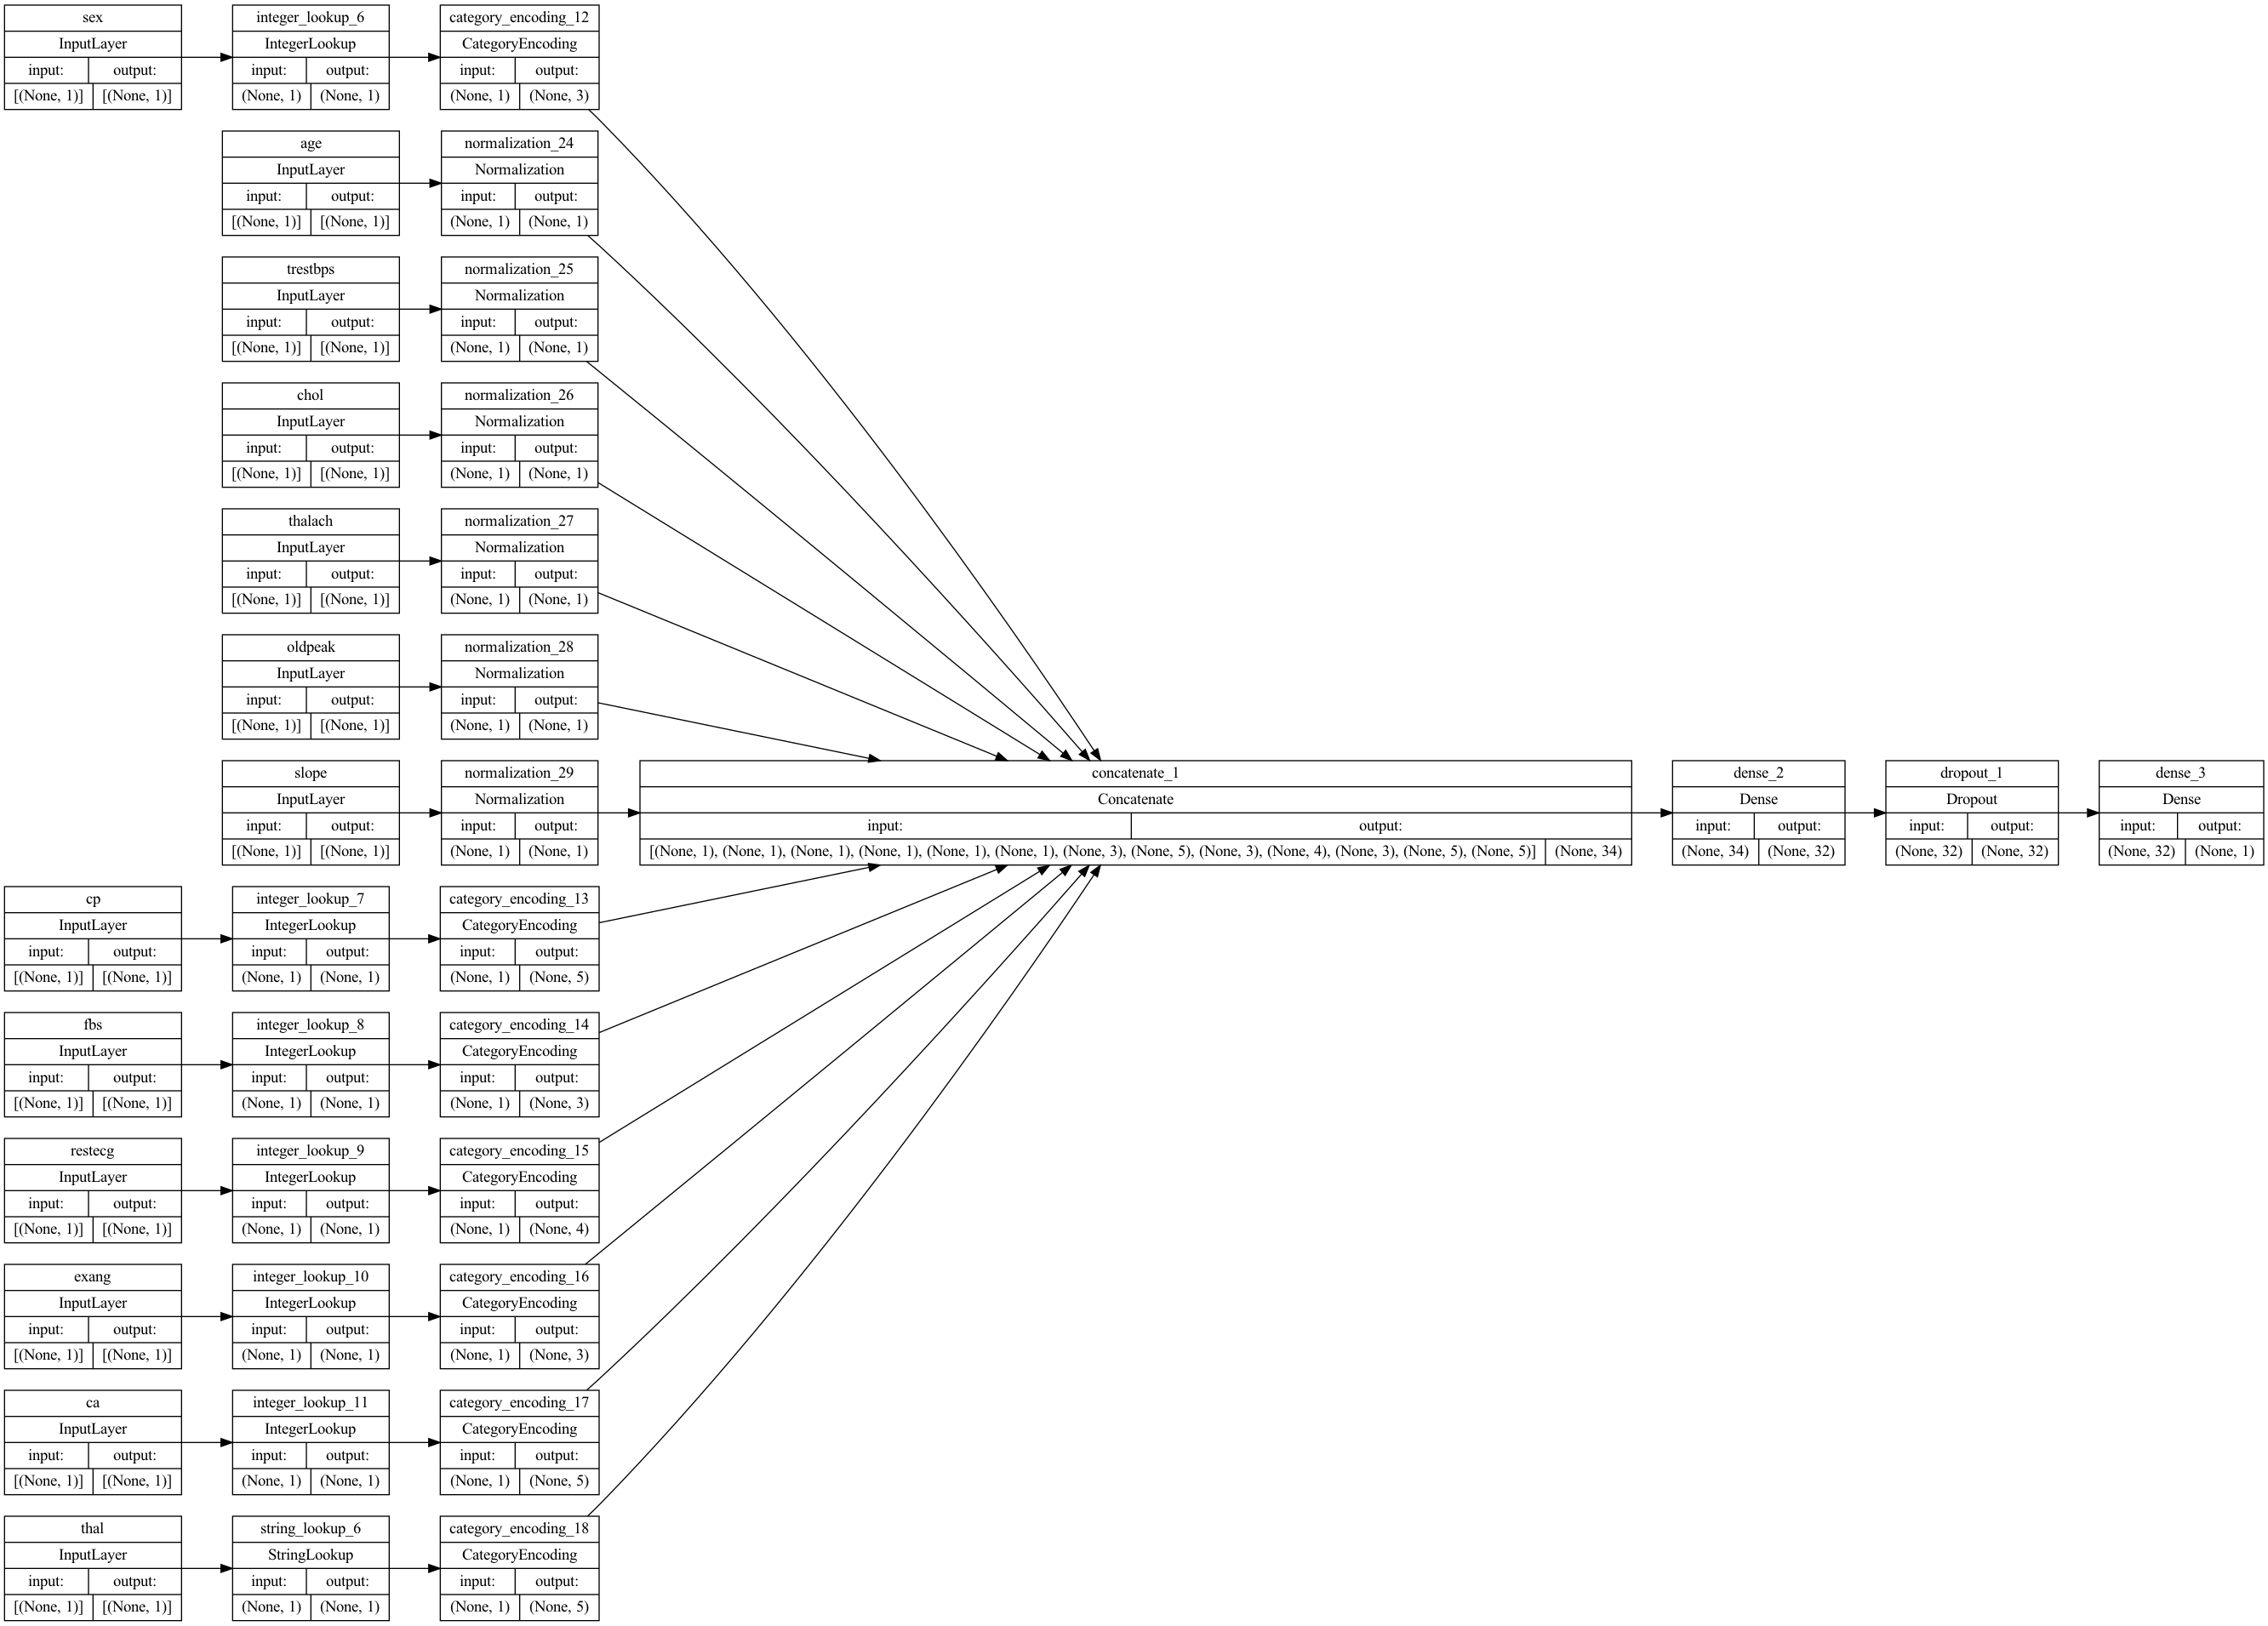

In [186]:
# Use `rankdir='LR'` to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Training

- Next, train and test the model:

In [187]:
model.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10
1/1 [==============================] - 1s 864ms/step - loss: 1.0739 - accuracy: 0.2521 - val_loss: 1.0825 - val_accuracy: 0.2459
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 1.0371 - accuracy: 0.2934 - val_loss: 1.0632 - val_accuracy: 0.2459
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1.0149 - accuracy: 0.2851 - val_loss: 1.0444 - val_accuracy: 0.2459
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 1.0180 - accuracy: 0.2727 - val_loss: 1.0260 - val_accuracy: 0.2459
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 0.9981 - accuracy: 0.2727 - val_loss: 1.0080 - val_accuracy: 0.2459
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 0.9892 - accuracy: 0.2521 - val_loss: 0.9902 - val_accuracy: 0.2295
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 0.9769 - accuracy: 0.2769 - val_loss: 0.9728 - val_accuracy: 0.2459
Epoch 8/10
1/1 [==========

In [188]:
loss, accuracy = model.evaluate(ds_val)

print("Accuracy", accuracy)

1/1 [==============================] - 0s 11ms/step - loss: 0.9230 - accuracy: 0.2295
Accuracy 0.2295081913471222


## Perform inference

- The model you have developed can now classify a row from a CSV file directly after you've included the preprocessing layers inside the model itself. Let's demonstrate the process:

- Save the heart diseases classification model

In [189]:
model.save('my_hd_classifier')

INFO:tensorflow:Assets written to: my_hd_classifier/assets


- Load model

In [190]:
reloaded_model = keras.models.load_model('my_hd_classifier')

- To get a prediction for a new sample, you can simply call the Keras Model.predict method.
- There are just two things you need to do:

  - Wrap scalars into a list so as to have a batch dimension (Models only process batches of data, not single samples).
  - Call tf.convert_to_tensor on each feature.

In [191]:

reloaded_model = tf.keras.models.load_model('my_pet_classifier')

OSError: No file or directory found at my_pet_classifier

In [ ]:
sample = {
    "age": 60,
    "sex": 1,
    "cp": 1,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 2,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 3,
    "ca": 0,
    "thal": "fixed",
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}

predictions = reloaded_model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

## Next steps

To learn more about classifying structured data, try working with other datasets. 

Below are some suggestions for datasets:

- [TensorFlow Datasets: MovieLens](https://www.tensorflow.org/datasets/catalog/movie_lens): A set of movie ratings from a movie recommendation service.

- [TensorFlow Datasets: Wine Quality](https://www.tensorflow.org/datasets/catalog/wine_quality): Two datasets related to red and white variants of the Portuguese "Vinho Verde" wine. You can also find the Red Wine Quality dataset on Kaggle.

- [Kaggle: arXiv Dataset](https://www.kaggle.com/Cornell-University/arxiv): A corpus of 1.7 million scholarly articles from arXiv, covering physics, computer science, math, statistics, electrical engineering, quantitative biology, and economics.